In [ ]:
Nameeta Tiwari
Analysis on Data Analycist Salary

Univariate Analysis on a.Experience Level of Employees b. Employees Residence
Bivariate Analysis on a.Salary vs. Employment Type b. Country vs. Number of job listings c. Number of job listings vs. Company Size

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statistics as stat

In [36]:
salary = "./ds_salaries.csv"
salary_df=pd.read_csv(salary)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [37]:
#Counting Rows and Columns in dataset
Rows = len(salary_df.axes[0])
Columns = len(salary_df.axes[1])

print(f"Total Rows : {Rows},  Total Columns : {Columns}")

Total Rows : 3755,  Total Columns : 11


In [38]:
Summary_df = salary_df.info()
Summary_df
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [39]:
#Checking for Null/Empty values in the dataset
no_entry_cell = salary_df.isnull().sum()
no_entry_cell

#No empty cell was found in the dataset. 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [40]:
#Find duplicate rows
duplicate_rows = salary_df[salary_df.duplicated()]
#Remove duplicate rows
salary_df = salary_df.drop_duplicates()
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [41]:
#Value counting for each columns for unique entries
value_counts = {column: salary_df[column].value_counts() for column in salary_df.columns}
value_counts

{'work_year': work_year
 2023    1156
 2022    1125
 2021     228
 2020      75
 Name: count, dtype: int64,
 'experience_level': experience_level
 SE    1554
 MI     664
 EN     270
 EX      96
 Name: count, dtype: int64,
 'employment_type': employment_type
 FT    2547
 PT      17
 CT      10
 FL      10
 Name: count, dtype: int64,
 'job_title': job_title
 Data Engineer                598
 Data Scientist               538
 Data Analyst                 396
 Machine Learning Engineer    206
 Analytics Engineer            91
                             ... 
 Compliance Data Analyst        1
 Deep Learning Researcher       1
 Staff Data Analyst             1
 Data DevOps Engineer           1
 Finance Data Analyst           1
 Name: count, Length: 93, dtype: int64,
 'salary': salary
 100000    70
 120000    59
 150000    58
 200000    48
 80000     46
           ..
 126277     1
 153088     1
 323300     1
 200160     1
 412000     1
 Name: count, Length: 815, dtype: int64,
 'salary_curren

In [42]:
#Creating and replacing  dictionary for Experience column
Exp_Dictionary={
    "SE": "Senior Level",
    "MI": "Medium Level",
    "EN": "Entry Level",
    "EX": "Executive Level"
}
salary_df["experience_level"]=salary_df["experience_level"].replace(Exp_Dictionary)
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Medium Level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Medium Level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior Level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior Level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Medium Level,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [43]:
#Categorical Analysis of Experience Level

Total_Exp_Count=salary_df["experience_level"].value_counts()
Total_Exp_Count

experience_level
Senior Level       1554
Medium Level        664
Entry Level         270
Executive Level      96
Name: count, dtype: int64

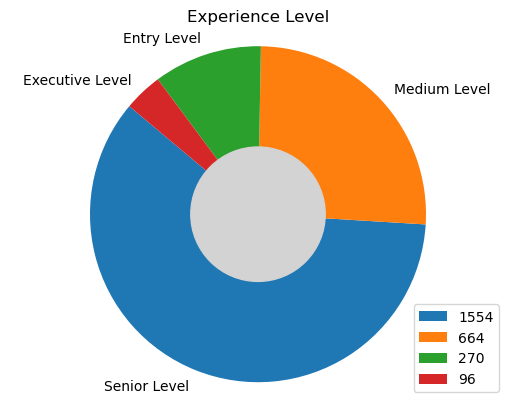

In [44]:
import matplotlib.pyplot as plt
labels = ["Senior Level", "Medium Level", "Entry Level", "Executive Level"]
sizes=[1554, 664, 270, 96]
fig, dounut_shape=plt.subplots()
dounut_shape.pie(sizes, startangle=140, labels=labels)
circle=plt.Circle((0,0), 0.4, color ="lightgrey")
dounut_shape.add_artist(circle)
dounut_shape.axis("equal")
plt.title("Experience Level")
plt.legend(sizes, loc="lower right")
plt.savefig("output_data_NT/Fig1_distribution_Experience_level.png")
plt.show()

In [45]:
#Experience Level Percentage
Perc_Explevel = Total_Exp_Count * 100 /salary_df["experience_level"].count()
Perc_Explevel=round(Perc_Explevel, 2)
Perc_Explevel

experience_level
Senior Level       60.14
Medium Level       25.70
Entry Level        10.45
Executive Level     3.72
Name: count, dtype: float64

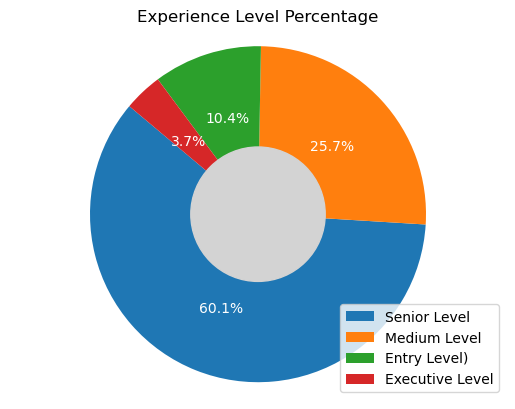

In [46]:
import matplotlib.pyplot as plt
labels = ["Senior Level", "Medium Level", "Entry Level)", "Executive Level"]
sizes=[60.14, 25.70, 10.45, 3.72]
fig, dounut_shape=plt.subplots()
dounut_shape.pie(sizes, startangle=140, labels=labels, autopct="%1.1f%%", textprops={"color":"white"})
circle=plt.Circle((0,0), 0.4, color ="lightgrey")
dounut_shape.add_artist(circle)
dounut_shape.axis("equal")
plt.title("Experience Level Percentage")
plt.legend(labels, loc="lower right")
plt.savefig("output_data_NT/Fig2_distribution_Percent_Experience_level.png")
plt.show()

In [ ]:
#Analysis : The graph shows 

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64


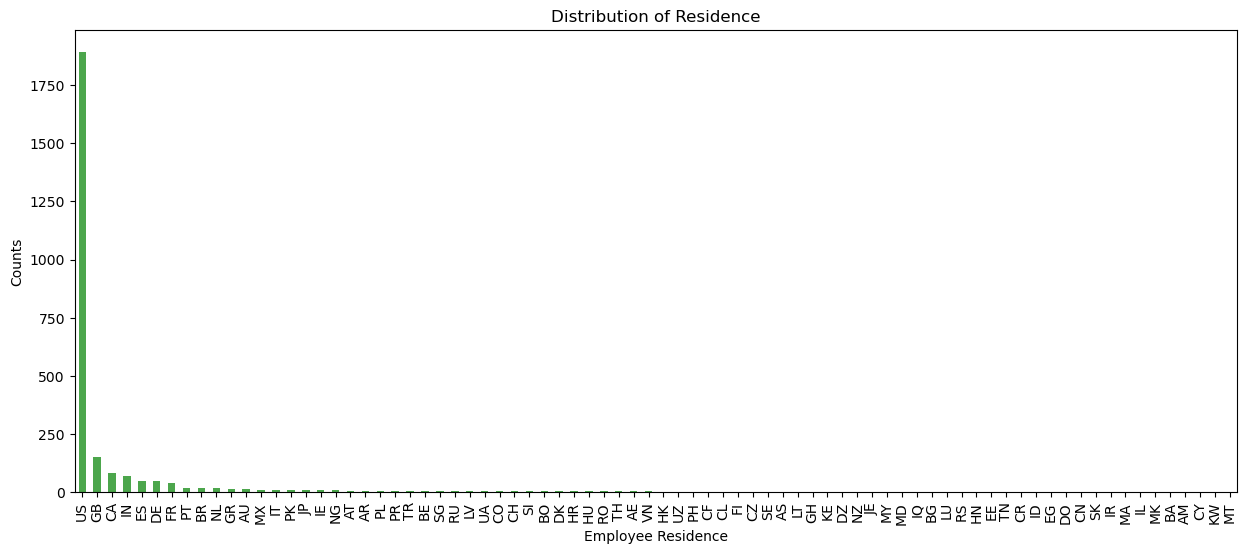

In [47]:
#plot bar chart for Residence of Employee
Emp_Residence =salary_df["employee_residence"].value_counts()
print(Emp_Residence)
fig = plt.figure(figsize = (15,6))
Emp_Residence.plot(kind="bar", color="green", alpha=0.7)

plt.xlabel("Employee Residence")
plt.ylabel("Counts")
plt.title("Distribution of Residence")
plt.xticks(rotation=90)
plt.savefig("output_data_NT/Fig3_distribution_Employee_Residence.png")
plt.show()

In [48]:
Top10_Resi=salary_df["employee_residence"].value_counts().head(10)
#Top10_Resi

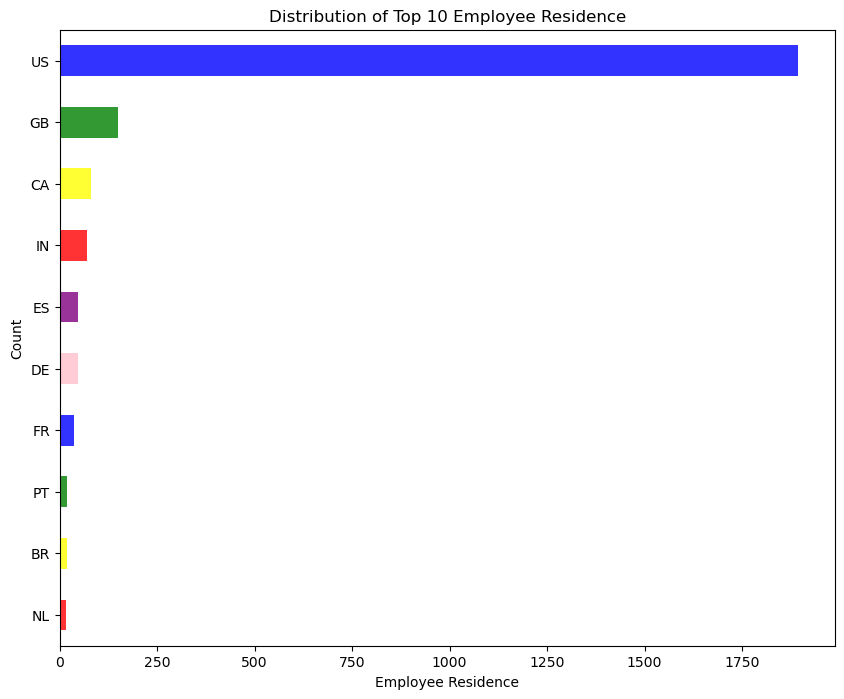

In [49]:
#There are 78 rows unique values for employee residence, so plotting for sample of top 10 employee residence

fig = plt.figure(figsize = (10,8))
color=["blue", "green", "yellow", "red", "purple", "pink"]
Map2 = Top10_Resi.plot(kind="barh", color=color, alpha=0.8).invert_yaxis()
plt.xticks(rotation="horizontal")
plt.title("Distribution of Top 10 Employee Residence")
plt.xlabel("Employee Residence")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig4_distribution_Top10_Employee_Residence.png")
plt.show()

In [50]:
Top11_Resi1=salary_df["employee_residence"].value_counts().head(11)
#Top10_Resi=pd.DataFrame(Top10_Resi1)
Top10_Resi = Top11_Resi1[1:]
#Top10_Resi = Top10_Resi.reset_index(drop=True)
print(Top10_Resi)

employee_residence
GB    150
CA     81
IN     70
ES     47
DE     47
FR     37
PT     18
BR     18
NL     15
GR     13
Name: count, dtype: int64


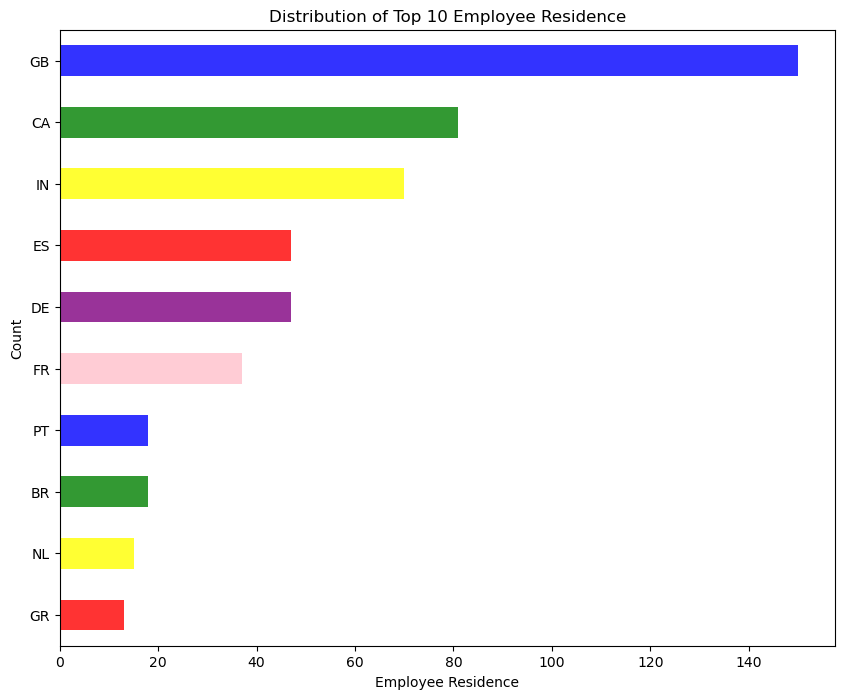

In [51]:
#The graph above shows that majority of employees working in data science related jobs are residence of US.
#To compare the data for other countries US is dropped from the data for comparison purpose.

fig = plt.figure(figsize = (10,8))
color=["blue", "green", "yellow", "red", "purple", "pink"]
Map2 = Top10_Resi.plot(kind="barh", color=color, alpha=0.8).invert_yaxis()
plt.xticks(rotation="horizontal")
plt.title("Distribution of Top 10 Employee Residence")
plt.xlabel("Employee Residence")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig5_distribution_Top10_No_US_Employee_Residence.png")
plt.show()

In [52]:
#Univariant Analysis :
#Distibution of Experience Level : The graph shows Senior Level experience has maximum number of entries in the dataset followed by Medium level, Entry level and Executive level.

#Distribution of Employee Residence: 73% of total employees in datascience fields are resident of US followed by GB, CA, ES, IN and so on.

In [53]:
#Creating and Replacing Employment Type 
Emp_dict={
    "FT" : "Full Time",
    "PT" : "Part Time",
    "CT" : "Contractual",
    "FL" : "Freelancer"
}
salary_df["employment_type"] = salary_df["employment_type"].replace(Emp_dict)

In [54]:
#Analysis of Salary vs Employment Types
Salary_Avg_Emp= salary_df.groupby("employment_type")["salary_in_usd"].mean()
print(Salary_Avg_Emp)
color=["green", "blue", "yellow", "red"]

employment_type
Contractual    113446.900000
Freelancer      51807.800000
Full Time      134434.613271
Part Time       39533.705882
Name: salary_in_usd, dtype: float64


In [76]:
#Analysis of Salary vs Employment Types
Salary_of_Emp= salary_df.groupby("employment_type")["salary_in_usd"].sum()
print(Salary_of_Emp)

employment_type
Contractual      1134469
Freelancer        518078
Full Time      342404960
Part Time         672073
Name: salary_in_usd, dtype: int64


In [55]:
# Put employment type into a list for for loop (and later for plot labels)
Employment_Type =  ["Full Time", "Contractual", "Freelancer", "Part Time"]

# Create empty list to fill with salary (for plotting)
Salary_Data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Emp in Employment_Type: 
    
    # Locate the rows which contain employment type and get the employment
    Salary_DF = salary_df.loc[salary_df["employment_type"] == Emp, "salary_in_usd"]
    
    # add subset 
    Salary_Data.append(Salary_DF)
    
    # Determine outliers using upper and lower bounds
    Quartiles =  Salary_DF.quantile([.25, .5, .75])
    LowerQuart = Quartiles[0.25]
    UpperQuart = Quartiles[0.75]
    iqr = UpperQuart-LowerQuart
    
    LowerBound = LowerQuart - (1.5 * iqr)
    UpperBound = UpperQuart + (1.5 * iqr)
    
    Outliers = Salary_DF.loc[(Salary_DF < LowerBound) |  (Salary_DF > UpperBound)]

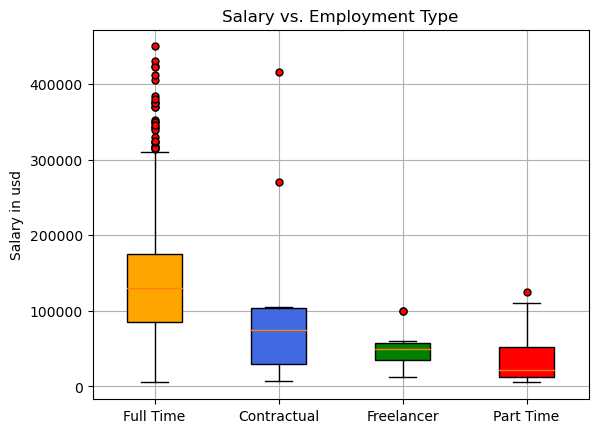

In [71]:
# Generate a box plot that shows the distrubution of salary over employment type.

OutlierPoint = dict(markerfacecolor="red", markersize = 5)
box=plt.boxplot(Salary_Data, labels=Employment_Type, patch_artist=True, flierprops=OutlierPoint)
colors = ['orange', 'royalblue', 'green',  'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    plt.grid(True)
plt.title('Salary vs. Employment Type')
plt.ylabel("Salary in usd")
plt.savefig("output_data_NT/Fig6_salary_Employment_level.png")
plt.show()

In [57]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outlier1=salary_df[(salary_df["salary_in_usd"]<310000)&(salary_df["employment_type"]=="Full Time")]
df_remove_outlier2=salary_df[(salary_df["salary_in_usd"]<100000)&(salary_df["employment_type"]=="Contractual")]
df_remove_outlier3=salary_df[(salary_df["salary_in_usd"]<50000)&(salary_df["employment_type"]=="Freelancer")]
df_remove_outlier4=salary_df[(salary_df["salary_in_usd"]<45000)&(salary_df["employment_type"]=="Part Time")]
dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier =pd.concat(dataframes)
final_df_remove_outlier

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,Senior Level,Full Time,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,Senior Level,Full Time,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3537,2021,Medium Level,Part Time,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
3576,2020,Entry Level,Part Time,ML Engineer,14000,EUR,15966,DE,100,DE,S
3687,2021,Entry Level,Part Time,Computer Vision Engineer,180000,DKK,28609,DK,50,DK,S
3710,2020,Entry Level,Part Time,Data Scientist,19000,EUR,21669,IT,50,IT,S


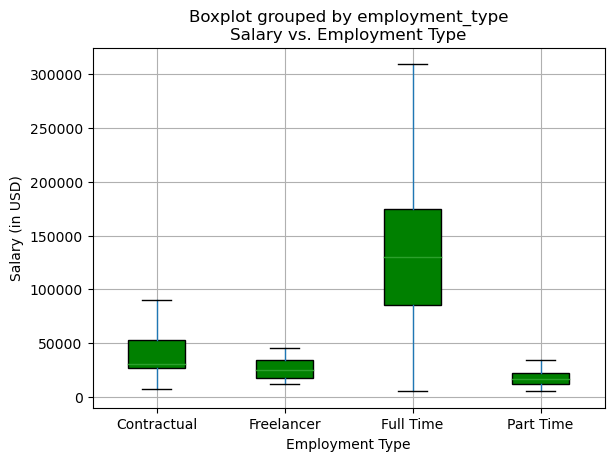

In [67]:
# Plotting Salary vs. Employment Typel (with removed outliers in salary_in_usd)
a="blue"
b="red"
c="green"
final_df_remove_outlier.boxplot(column=["salary_in_usd"], by=["employment_type"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a))

plt.title('Salary vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
plt.savefig("output_data_NT/Fig7_salary_Employment__RemovedOutlier_level.png")
plt.show()

#There's a clear trend that as employment type differes, the median salary also differs. 
#The Full Time employees has the highest median salary, followed by Contractual, Freelancer, and Part Time. 
#The spread of salaries (as shown by the height of the boxes) also seems to differ with difference in emplyment type.

<Figure size 1000x800 with 0 Axes>

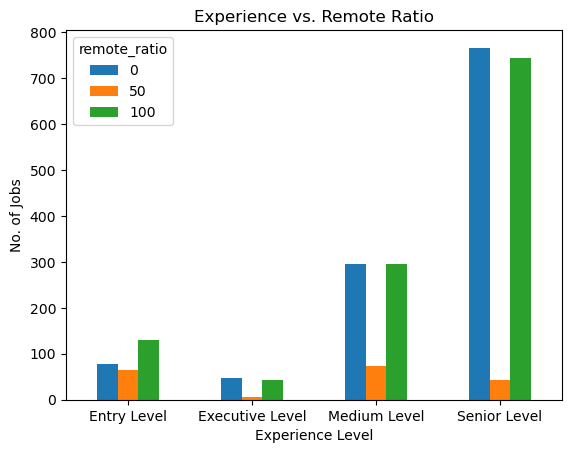

In [82]:
#Analysis of distribution over Experience over Remote Ratio

reduced_dataframe=salary_df.groupby(["experience_level"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
experience_employment_Df=reduced_dataframe.groupby(["experience_level"])["no_of_jobs"].sum()
making_dataframe=experience_employment_Df.to_frame().reset_index()

final_dataframe_Emp_Exp = reduced_dataframe[reduced_dataframe["experience_level"].isin(making_dataframe["experience_level"])]
fig = plt.figure(figsize = (10,8))
pivot_dataframe_plotting=final_dataframe_Emp_Exp.pivot(index="experience_level", columns ="remote_ratio", values ="no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title("Experience vs. Remote Ratio")
plt.xlabel('Experience Level')
plt.ylabel('No. of Jobs')
plt.xticks(rotation=0)
plt.savefig("output_data_NT/Fig8_Experience-Remote.png")
plt.show()

In [60]:
#Analysis : The data shows that majority of senior level employees irrespective of their experience level preferred 
#to work either 100 % on-site or remote and least preferred hybrid working mode.